In [1]:
%matplotlib inline

seed_value = 100
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats


import warnings
warnings.filterwarnings('ignore')

# Data uploading

In [2]:
#AIRPORT_ICAO = "ESGG"
AIRPORT_ICAO = "ESSA"

DATA_DIR = os.path.join("..", "..")
DATA_DIR = os.path.join(DATA_DIR, "data")
DATA_DIR = os.path.join(DATA_DIR, "Regression")

# AIF
filename = AIRPORT_ICAO + "_metrics_AIF_vertical_PIs_by_hour.csv"
full_filename = os.path.join(DATA_DIR, filename)
metrics_AIF_vertical_PIs_by_hour_df = pd.read_csv(full_filename, sep=' ')

# WIF
filename = AIRPORT_ICAO + "_metrics_WIF_vertical_PIs_by_hour.csv"
full_filename = os.path.join(DATA_DIR, filename)
metrics_WIF_vertical_PIs_by_hour_df = pd.read_csv(full_filename, sep=' ')

# TIF
filename = AIRPORT_ICAO + "_metrics_TIF_vertical_PIs_by_hour.csv"
full_filename = os.path.join(DATA_DIR, filename)
metrics_TIF_vertical_PIs_by_hour_df = pd.read_csv(full_filename, sep=' ')

# Average Time On Levels

## Medians of Average Time On Levels vs TIF

                            OLS Regression Results                            
Dep. Variable:     timeOnLevelsMedian   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     13.42
Date:                Mon, 30 May 2022   Prob (F-statistic):            0.00637
Time:                        14:57:39   Log-Likelihood:                -2.1550
No. Observations:                  10   AIC:                             8.310
Df Residuals:                       8   BIC:                             8.915
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8372      0.229     16.738      0.0

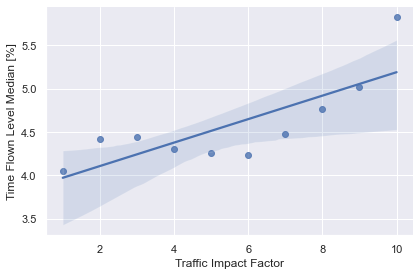

In [3]:
df = metrics_TIF_vertical_PIs_by_hour_df.copy()
df['TIF'] = df['TIF'].astype(float)
df = df[df['numberOfFlights']>0]
#p1 = df["timeOnLevelsPercentMean"].quantile(0.05)
#p2 = df["timeOnLevelsPercentMean"].quantile(0.95)
#df = df.loc[(df['timeOnLevelsPercentMean'] > p1) & (df['timeOnLevelsPercentMean'] < p2) ]

df.set_index(['TIF'], inplace=True)
df.sort_index(inplace=True)

median_df = pd.DataFrame(columns=['TIF', 'timeOnLevelsMedian'])

for idx, group in df.groupby(level='TIF'):
    
    idx_df = group['timeOnLevelsPercentMean']

    idx_median = np.median(idx_df)
    median_df = median_df.append({'TIF': idx, 'timeOnLevelsMedian': idx_median}, ignore_index=True)

median_df['TIF'] = median_df['TIF'].astype(np.float)
median_df['timeOnLevelsMedian'] = median_df['timeOnLevelsMedian'].astype(np.float)

sns.set(rc={'figure.figsize':(1,1)})
sns_plot = sns.lmplot(x='TIF',y='timeOnLevelsMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Traffic Impact Factor')
plt.ylabel('Time Flown Level Median [%]')
fig_name = "TimeOnLevelsVsTIF.png"
plt.savefig(fig_name, bbox_inches='tight')

#statsmodel:
X_df = median_df[['TIF']]
y_df = median_df[['timeOnLevelsMedian']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df.astype(float), X2.astype(float))
est2 = est.fit()
print(est2.summary()) 
# with outliers - ESGG: 0.13 ESSA: 0.63
# without outliers - ESGG: 0.01 ESSA: 0.4

## Medians of Average Time On Levels vs WIF

424
2316
3382
2618
2127
1256
492
163
34
9
                            OLS Regression Results                            
Dep. Variable:     timeOnLevelsMedian   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     25.16
Date:                Mon, 30 May 2022   Prob (F-statistic):            0.00103
Time:                        15:16:30   Log-Likelihood:                -10.737
No. Observations:                  10   AIC:                             25.47
Df Residuals:                       8   BIC:                             26.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

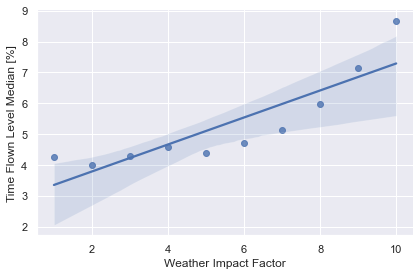

In [7]:
df = metrics_WIF_vertical_PIs_by_hour_df.copy()
df = df[df['numberOfFlights']>0]
#p1 = df["timeOnLevelsPercentMean"].quantile(0.05)
#p2 = df["timeOnLevelsPercentMean"].quantile(0.95)
#df = df.loc[(df['timeOnLevelsPercentMean'] > p1) & (df['timeOnLevelsPercentMean'] < p2) ]

df.set_index(['WIF'], inplace=True)
df.sort_index(inplace=True)

median_df = pd.DataFrame(columns=['WIF', 'timeOnLevelsMedian'])

for idx, group in df.groupby(level='WIF'):
    
    idx_df = group['timeOnLevelsPercentMean']
    print(len(idx_df))
    
    idx_median = np.median(idx_df)
    median_df = median_df.append({'WIF': idx, 'timeOnLevelsMedian': idx_median}, ignore_index=True)

median_df['WIF'] = median_df['WIF'].astype(np.float)
median_df['timeOnLevelsMedian'] = median_df['timeOnLevelsMedian'].astype(np.float)

sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='WIF',y='timeOnLevelsMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Weather Impact Factor')
plt.ylabel('Time Flown Level Median [%]')

#statsmodel:
X_df = median_df[['WIF']]
y_df = median_df[['timeOnLevelsMedian']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary()) 
# with outliers - ESGG: 0.57 ESSA: 0.76
# without outliers - ESGG: 0.93 ESSA: 0.73

## Medians of Average Time On Levels vs AIF¶

In [ ]:
df = metrics_AIF_vertical_PIs_by_hour_df.copy()
#df = df[df['numberOfFlights']>0]
p1 = df["timeOnLevelsPercentMean"].quantile(0.05)
p2 = df["timeOnLevelsPercentMean"].quantile(0.95)
#df = df.loc[(df['timeOnLevelsPercentMean'] > p1) & (df['timeOnLevelsPercentMean'] < p2) ]

df.set_index(['AIF'], inplace=True)
df.sort_index(inplace=True)

median_df = pd.DataFrame(columns=['AIF', 'timeOnLevelsMedian'])

for idx, group in df.groupby(level='AIF'):
    
    idx_df = group['timeOnLevelsPercentMean']
    
    idx_median = np.median(idx_df)
    median_df = median_df.append({'AIF': idx, 'timeOnLevelsMedian': idx_median}, ignore_index=True)

sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='AIF',y='timeOnLevelsMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Aggregated Impact Factor')
plt.ylabel('Time Flown Level Median [%]')

#statsmodel:
X_df = median_df[['AIF']]
y_df = median_df[['timeOnLevelsMedian']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary()) 
# with outliers - ESGG: 0.71 ESSA: 0.85
# without outliers - ESGG: 0.72 ESSA: 0.75

In [ ]:
median_df = pd.DataFrame(columns=['TIF', 'timeOnLevelsMedian'])

median_df = median_df.append({'TIF': 1.0, 'timeOnLevelsMedian': 1.0}, ignore_index=True)
median_df = median_df.append({'TIF': 2.0, 'timeOnLevelsMedian': 2.0}, ignore_index=True)
median_df = median_df.append({'TIF': 3.0, 'timeOnLevelsMedian': 3.0}, ignore_index=True)

median_df['TIF'] = median_df['TIF'].astype(np.float)
median_df['timeOnLevelsMedian'] = median_df['timeOnLevelsMedian'].astype(np.float)
#x= median_df['TIF'].to_numpy()
#x = x.astype(np.float)
#y= median_df['timeOnLevelsMedian'].to_numpy()
#y = y.astype(np.float)
sns.regplot(x='TIF', y='timeOnLevelsMedian', data=median_df)
#sns.regplot(x=x, y=y, color="g")
plt.xlabel('Traffic Impact Factor')
plt.ylabel('Time Flown Level Median [%]')
fig_name = "temp.png"

plt.savefig(fig_name,bbox_inches='tight')
#plt.show()

In [ ]:
import numpy as np; np.random.seed(8)
mean, cov = [4, 6], [(1.5, .7), (.7, 1)]
x, y = np.random.multivariate_normal(mean, cov, 8).T
print(x)
print(y)
sns.regplot(x=x, y=y, color="g")